In [62]:
import pandas as pd
import numpy as np
import datetime
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
import  plotly.express as pxfrom 
import plotly.graph_objects as go
from tabulate import tabulate
import  plotly.express as px
from matplotlib.patches import Patch
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import svm
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("final.csv", encoding="ISO-8859-1",low_memory=False)

In [3]:
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  1.970000e+11   1970       7     2        NaN         0        NaN       58   
1  1.970000e+11   1970       0     0        NaN         0        NaN      130   
2  1.970010e+11   1970       1     0        NaN         0        NaN      160   
3  1.970010e+11   1970       1     0        NaN         0        NaN       78   
4  1.970010e+11   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [4]:
print(((data.isnull().sum()/data.shape[0])*100).to_markdown())

|                    |           0 |
|:-------------------|------------:|
| eventid            |  0          |
| iyear              |  0          |
| imonth             |  0          |
| iday               |  0          |
| approxdate         | 93.9101     |
| extended           |  0          |
| resolution         | 97.6908     |
| country            |  0          |
| country_txt        |  0          |
| region             |  0          |
| region_txt         |  0          |
| provstate          |  0          |
| city               |  0.198448   |
| latitude           |  2.20156    |
| longitude          |  2.20203    |
| specificity        |  0.00046584 |
| vicinity           |  0          |
| location           | 67.6274     |
| summary            | 30.8013     |
| crit1              |  0          |
| crit2              |  0          |
| crit3              |  0          |
| doubtterr          |  0          |
| alternative        | 83.0024     |
| alternative_txt    | 83.0024     |
|

In [5]:
data_=data[["eventid","iyear","imonth","iday","extended","country_txt","region_txt","city","crit1","crit2","crit3","doubtterr","multiple","success","suicide","attacktype1_txt","targtype1_txt","target1","natlty1_txt","gname","guncertain1","weaptype1_txt","nkill","nwound","property","ishostkid","dbsource","INT_LOG","INT_IDEO","INT_MISC"]]

In [6]:
data_v2=data_.dropna()
print(f"Total number of row containing null removed = {data_.shape[0]-data_v2.shape[0]}\nWhich is {round(((data_.shape[0]-data_v2.shape[0])/data_v2.shape[0])*100)}% of total dataset")

Total number of row containing null removed = 24894
Which is 13% of total dataset


In [7]:
print(f"number of duplicated rows in our dataset = {data_v2.duplicated().sum()}")

number of duplicated rows in our dataset = 9815


In [8]:
fmt_data=data_v2.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region","city":"City","attacktype1_txt":"Attack_Type","targtype1_txt":"Target_Type","target1":"Target","extended":"Extended","natlty1_txt":"Nationality","gname":"Group_Name","ishostkid":"Kidnapped","dbsource":"Source","weaptype1_txt":"Weapon_Type","guncertain1":"Gang_Sus"})
fmt_data.head()

eventid  Year  Month  Day  Extended             Country  \
0  1.970000e+11  1970      7    2         0  Dominican Republic   
1  1.970000e+11  1970      0    0         0              Mexico   
2  1.970010e+11  1970      1    0         0         Philippines   
5  1.970010e+11  1970      1    1         0       United States   
6  1.970010e+11  1970      1    2         0             Uruguay   

                        Region           City  crit1  crit2  ...  Gang_Sus  \
0  Central America & Caribbean  Santo Domingo      1      1  ...       0.0   
1                North America    Mexico city      1      1  ...       0.0   
2               Southeast Asia        Unknown      1      1  ...       0.0   
5                North America          Cairo      1      1  ...       0.0   
6                South America     Montevideo      1      1  ...       0.0   

   Weapon_Type  nkill  nwound  property Kidnapped          Source INT_LOG  \
0      Unknown    1.0     0.0         0       0.0            PGIS       0   
1      Unknown    0.0     0.0         0       1.0            PGIS       0   
2      Unknown    1.0     0.0         0       0.0            PGIS      -9   
5     Firearms    0.0     0.0         1       0.0  Hewitt Project      -9   
6     Firearms    0.0     0.0         0       0.0            PGIS       0   

  INT_IDEO INT_MISC  
0        0        0  
1        1        1  
2       -9        1  
5       -9        0  
6        0        0  

[5 rows x 30 columns]

In [9]:
Cols=["Extended","crit1","crit2","crit3","doubtterr","multiple","success","suicide","Gang_Sus","property","Kidnapped","INT_LOG","INT_IDEO","INT_MISC"]
for col in Cols:
    fmt_data[col].replace(to_replace=[0,1,-9],value=["No","Yes","Unknown"],inplace=True)
fmt_data.head()

eventid  Year  Month  Day Extended             Country  \
0  1.970000e+11  1970      7    2       No  Dominican Republic   
1  1.970000e+11  1970      0    0       No              Mexico   
2  1.970010e+11  1970      1    0       No         Philippines   
5  1.970010e+11  1970      1    1       No       United States   
6  1.970010e+11  1970      1    2       No             Uruguay   

                        Region           City crit1 crit2  ... Gang_Sus  \
0  Central America & Caribbean  Santo Domingo   Yes   Yes  ...       No   
1                North America    Mexico city   Yes   Yes  ...       No   
2               Southeast Asia        Unknown   Yes   Yes  ...       No   
5                North America          Cairo   Yes   Yes  ...       No   
6                South America     Montevideo   Yes   Yes  ...       No   

  Weapon_Type nkill nwound property Kidnapped          Source  INT_LOG  \
0     Unknown   1.0    0.0       No        No            PGIS       No   
1     Unknown   0.0    0.0       No       Yes            PGIS       No   
2     Unknown   1.0    0.0       No        No            PGIS  Unknown   
5    Firearms   0.0    0.0      Yes        No  Hewitt Project  Unknown   
6    Firearms   0.0    0.0       No        No            PGIS       No   

  INT_IDEO INT_MISC  
0       No       No  
1      Yes      Yes  
2  Unknown      Yes  
5  Unknown       No  
6       No       No  

[5 rows x 30 columns]

In [10]:
num = [i for i in fmt_data.columns if fmt_data.dtypes[i] == 'int64']
for j in num:
    if j!="eventid":
        print('\033[95m' + j + '\033[0m')
        print(sorted(fmt_data[j].unique()))

Year
[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Month
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Day
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [11]:
Cols=["Month","Day"]
for col in Cols:
    fmt_data[col].replace(to_replace=0,value=1,inplace=True)

In [12]:
fmt_data.dtypes.to_frame()

0
eventid      float64
Year           int64
Month          int64
Day            int64
Extended      object
Country       object
Region        object
City          object
crit1         object
crit2         object
crit3         object
doubtterr     object
multiple      object
success       object
suicide       object
Attack_Type   object
Target_Type   object
Target        object
Nationality   object
Group_Name    object
Gang_Sus      object
Weapon_Type   object
nkill        float64
nwound       float64
property      object
Kidnapped     object
Source        object
INT_LOG       object
INT_IDEO      object
INT_MISC      object

In [13]:
fmt_data.shape
clean_data = fmt_data
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189772 entries, 0 to 214665
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   eventid      189772 non-null  float64
 1   Year         189772 non-null  int64  
 2   Month        189772 non-null  int64  
 3   Day          189772 non-null  int64  
 4   Extended     189772 non-null  object 
 5   Country      189772 non-null  object 
 6   Region       189772 non-null  object 
 7   City         189772 non-null  object 
 8   crit1        189772 non-null  object 
 9   crit2        189772 non-null  object 
 10  crit3        189772 non-null  object 
 11  doubtterr    189772 non-null  object 
 12  multiple     189772 non-null  object 
 13  success      189772 non-null  object 
 14  suicide      189772 non-null  object 
 15  Attack_Type  189772 non-null  object 
 16  Target_Type  189772 non-null  object 
 17  Target       189772 non-null  object 
 18  Nationality  189772 non-

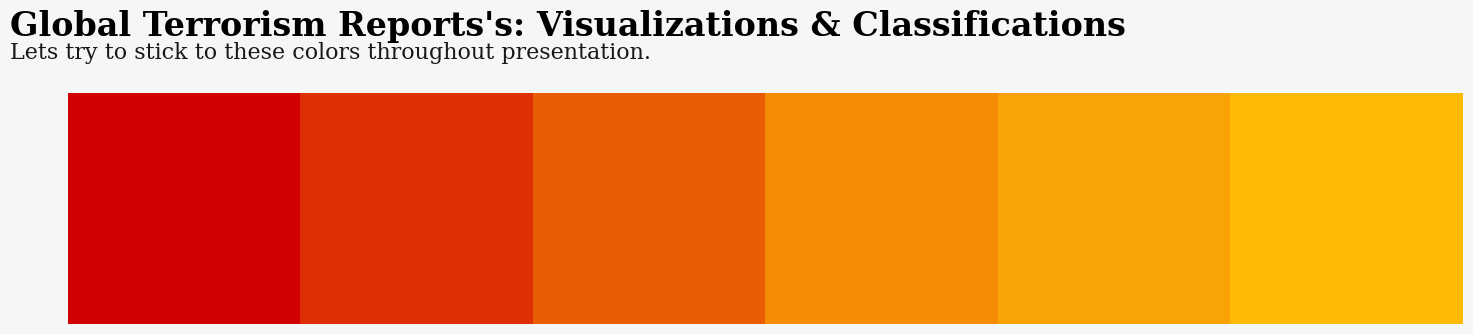

In [14]:
color_pallete= ["#d10001","#dd2f03","#e95d05","#f48c06","#faa307","#ffba08"]
sns.palplot(color_pallete, size = 3)
plt.text(-0.75,-0.75, "Global Terrorism Reports's: Visualizations & Classifications",{'font':'serif', 'size':24, 'weight':'bold'})
plt.text(-0.75,-0.65, 'Lets try to stick to these colors throughout presentation.',{'font':'serif', 'size':16},alpha = 0.9)
plt.gcf().set_facecolor('#f5f6f6')
plt.gcf().set_dpi(100)
plt.box(None)
plt.axis('off')
plt.show()

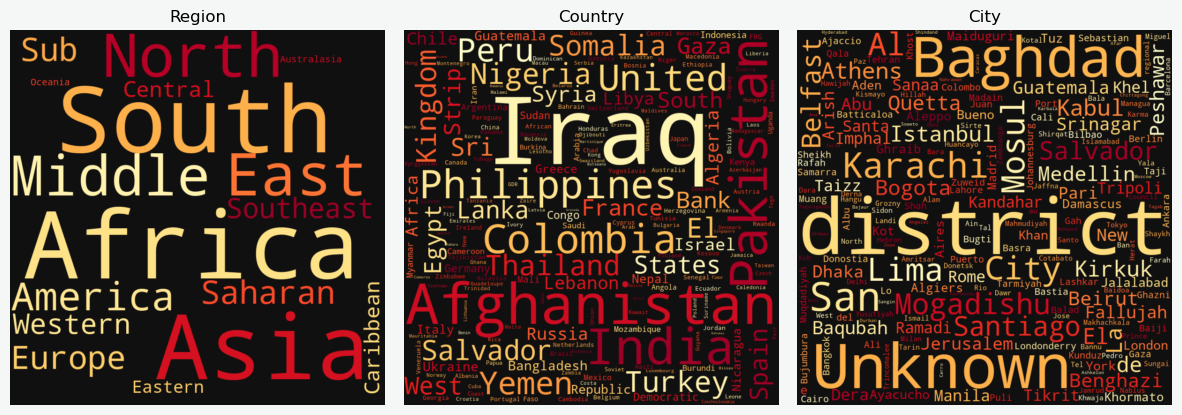

In [15]:
#create wordcloud from series of words
def create_wordcloud(series1,series2,series3):
    wordcloud1 = WordCloud(width=800, height=800, background_color="#111010", max_font_size=200,collocations=False,colormap="YlOrRd").generate(' '.join(series1))
    wordcloud2 = WordCloud(width=800, height=800, background_color="#111010", max_font_size=200,collocations=False,colormap="YlOrRd").generate(' '.join(series2))
    wordcloud3 = WordCloud(width=800, height=800, background_color="#111010", max_font_size=200,collocations=False,colormap="YlOrRd").generate(' '.join(series3))
    fig,axs=plt.subplots(1,3,figsize=(15,15))
    fig.subplots_adjust(hspace=0.0, wspace=0.05)
    plt.gcf().set_facecolor('#f5f6f6')
    axs[0].imshow(wordcloud1, interpolation="bilinear")
    axs[0].set_title((series1.reset_index().columns[1]))
    axs[0].axis("off")
    axs[1].imshow(wordcloud2, interpolation="bilinear")
    axs[1].set_title((series2.reset_index().columns[1]))
    axs[1].axis("off")
    axs[2].imshow(wordcloud3, interpolation="bilinear")
    axs[2].set_title((series3.reset_index().columns[1]))
    axs[2].axis("off")
    plt.show()

create_wordcloud(clean_data.Region,clean_data.Country,clean_data.City)

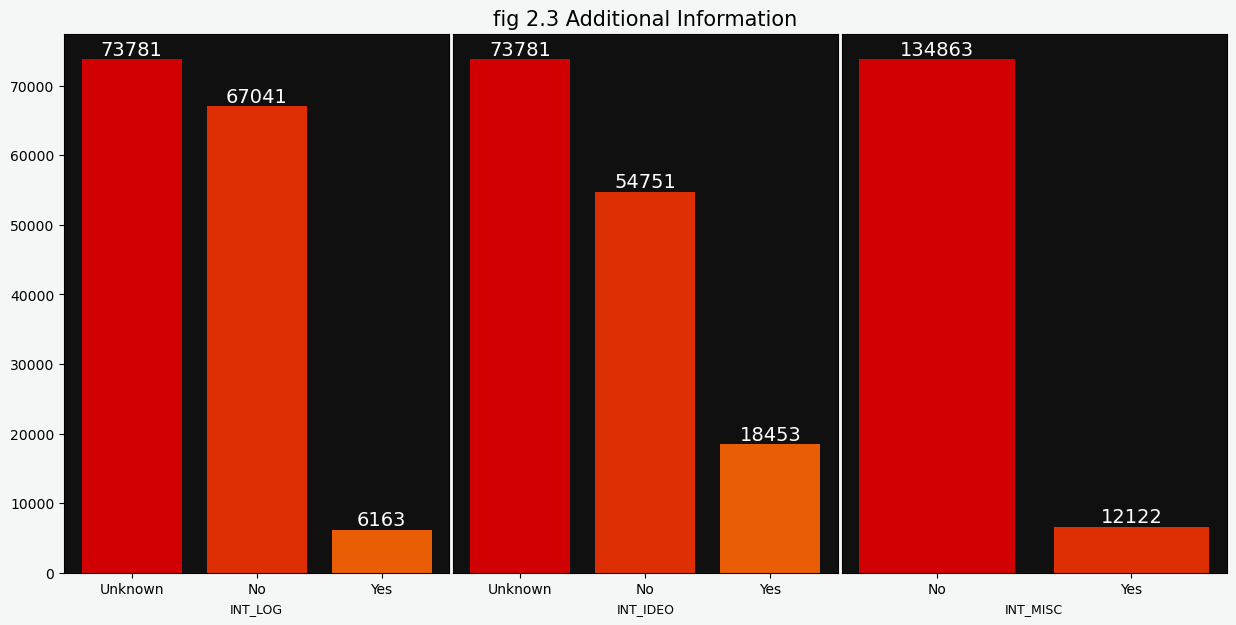

In [16]:
int_log=clean_data[clean_data.doubtterr=="No"].INT_LOG.value_counts().reset_index().rename(columns={"index":"Element"})
int_ideo=clean_data[clean_data.doubtterr=="No"].INT_IDEO.value_counts().reset_index().rename(columns={"index":"Element"})
int_misc=clean_data[clean_data.doubtterr=="No"].INT_MISC.value_counts().reset_index().rename(columns={"index":"Element"})

#Creating a barplot showcasing Success rate
fig,axs=plt.subplots(figsize=(15,7))
plt.gcf().set_facecolor('#f5f6f6')


s_rate = [clean_data[clean_data.doubtterr=="No"].eventid.nunique(),
          clean_data[clean_data.doubtterr=="No"][clean_data.success=="Yes"][clean_data.multiple=="No"].eventid.nunique(),
          clean_data[clean_data.doubtterr=="No"][clean_data.property=="Yes"].eventid.nunique(),
          clean_data[clean_data.doubtterr=="No"][clean_data.multiple=="Yes"].eventid.nunique(),
          clean_data[clean_data.doubtterr=="No"][clean_data.Kidnapped=="Yes"].eventid.nunique(),
          clean_data[clean_data.doubtterr=="No"][clean_data.Extended=="Yes"].eventid.nunique(),         ]
keys=["Total Attack","Succeeded","Property","Multiple","Kidnapped","Extended"]

# plotting data on chart
axs.bar(x=keys,height=s_rate,color=color_pallete,linewidth=3)
axs.set_facecolor('#111010')

for i in axs.containers:
    axs.bar_label(i,color="white",fontsize=14)
# displaying chart
plt.xlabel("Categories")
plt.ylabel("Counts")

axs.set_title("fig 2.2 Categorical Summary",fontsize=15)

plt.show()

fig,axs=plt.subplots(1,3,figsize=(15,7), constrained_layout=True)
plt.gcf().set_facecolor('#f5f6f6')
fig.subplots_adjust(hspace=0.0, wspace=0.01)

axs[0].bar(height=int_log.INT_LOG,x=int_log.Element,color=color_pallete)
axs[0].set_xlabel("INT_LOG",fontsize=9)
axs[0].set_facecolor('#111010')

axs[1].bar(height=int_ideo.INT_IDEO,x=int_ideo.Element,color=color_pallete)
axs[1].set_xlabel("INT_IDEO",fontsize=9)
axs[1].get_yaxis().set_visible(False)
axs[1].set_facecolor('#111010')
axs[1].set_title("fig 2.3 Additional Information",fontsize=15)

axs[2].bar(height=int_misc.INT_MISC,x=int_misc.Element,color=color_pallete)
axs[2].set_xlabel("INT_MISC",fontsize=9)
axs[2].get_yaxis().set_visible(False)
axs[2].set_facecolor('#111010')


for j in range(3):
    for i in axs[j].containers:
        axs[j].bar_label(i,color="white",fontsize=14)

plt.show()


In [17]:
count=clean_data.Year.value_counts().reset_index(name="Counts").rename(columns={"index":"Year"}).sort_values(by=("Year")).Counts
color_list=[]
for num in count:
    if num<=2500:
        color_list.append("#ffb601")
    elif num<=5000 and num>2500:
        color_list.append("#f48c06")
    elif num<=7500  and num>5000:
        color_list.append("#e95d05")
    elif num<10000 and num>7500:
        color_list.append("#dd2e02")
    elif num>=10000:
        color_list.append("#d00000")
        
fig,axs= plt.subplots(figsize=(10,15))
plt.gcf().set_facecolor('#f5f6f6')

sns.countplot(data=clean_data,y="Year",palette=color_list,linewidth=1)
for i in axs.containers:
            axs.bar_label(i,color="white",fontsize=10,padding=2)
axs.set_facecolor('#111010')
plt.title("Fig 3.1. Total Terrorist Cases Registered Annually",fontsize=14)
#plt.grid()
elements=[Patch(facecolor='#ffb601',
                        label='< 2,500'),
                Patch(facecolor='#f48c06',
                        label='< 5,000'),
                Patch(facecolor='#e95d05',
                        label='< 7,500'),
                Patch(facecolor='#dd2e02',
                        label='< 10,000'),
                Patch(facecolor='#d00000',
                        label='> 10,000')]
axs.legend(handles=elements,title="Counts",fontsize=12)
plt.tight_layout()


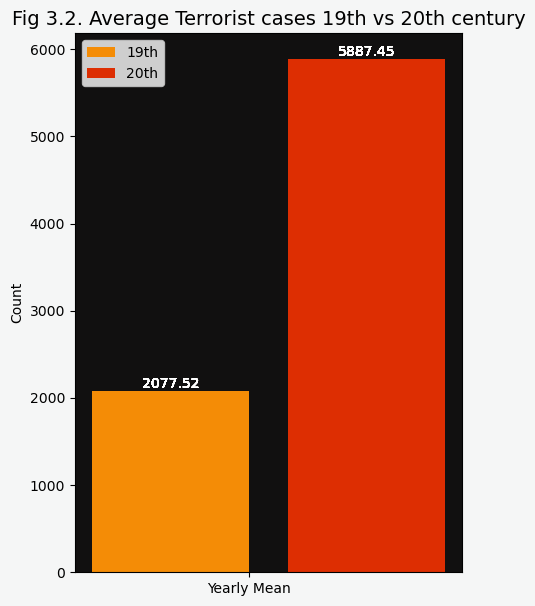

In [18]:
fig,axs=plt.subplots(figsize=(5,7))
x=np.arange(1)
data_19s = clean_data[clean_data.Year<2000]
data_20s = clean_data[clean_data.Year>=2000]
axs.bar(x-0.2,data_19s.groupby("Year").count().mean(),width=0.4,color="#f48c06",)
axs.bar(x+0.3,data_20s.groupby("Year").count().mean(),width=0.4,color="#dd2e02")
plt.gcf().set_facecolor('#f5f6f6')
plt.xticks(x, ['Yearly Mean'])
for i in axs.containers:
            axs.bar_label(i,color="white",fontsize=10)
axs.set_facecolor('#111010')
plt.ylabel("Count")
plt.legend(["19th", "20th",])
plt.title("Fig 3.2. Average Terrorist cases 19th vs 20th century",fontsize=14)

plt.show()

In [19]:
state_t=clean_data.Country.value_counts().reset_index(name="Counts").rename(columns={"index":"Country"})
state_b=clean_data[clean_data.Year<2000].Country.value_counts().head(5).reset_index(name="Counts").rename(columns={"index":"Country"})
state_a=clean_data[clean_data.Year>=2000].Country.value_counts().head(5).reset_index(name="Counts").rename(columns={"index":"Country"})

fig,axs=plt.subplots(figsize=(15,7))
plt.gcf().set_facecolor('#f5f6f6')

axs.bar(height=state_t.Counts.head(5),x=state_t.Country.head(5),color=color_pallete)
axs.set_xlabel("Country",fontsize=12)
axs.set_facecolor('#111010')
axs.set_title("Fig 4.1. top 5 countries with the most number of terrorist attacks between 1970 and 2021",fontsize=14)

for i in axs.containers:
    axs.bar_label(i,color="white",fontsize=14)
plt.show()

fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.gcf().set_facecolor('#111010')

fig.subplots_adjust(hspace=0.0, wspace=0.1)
plt.gcf().set_facecolor('#f5f6f6')
axs[0].bar(height=state_b.Counts,x=state_b.Country,color=color_pallete)
axs[0].set_xlabel("Country",fontsize=12)
axs[0].set_facecolor('#111010')
axs[0].set_title("Fig 4.2. top 5 country's Between 1970-1999",fontsize=14)

axs[1].bar(height=state_a.Counts,x=state_a.Country,color=color_pallete)
axs[1].set_xlabel("Country",fontsize=12)
axs[1].set_facecolor('#111010')
axs[1].set_title("fig 4.3. top 5 country's between 2000-2021",fontsize=14)

for j in range(2):
    for i in axs[j].containers:
        axs[j].bar_label(i,color="white",fontsize=14)
plt.show()



In [22]:
df2 = pd.DataFrame()
list_contry=clean_data.Country.value_counts().reset_index(name="Counts").rename(columns={"index":"Country"}).head(10).Country.tolist()
s = clean_data.groupby("Year").Country.value_counts().reset_index(name="Counts").rename(columns={"index":"Country"})
s=s.loc[s['Country'].isin(list_contry)]

fig = px.bar(x=s.Year.astype(str),y=s.Counts,color=s.Country,text_auto='.1s',
             color_discrete_sequence=['#ffd101', '#ffb601', '#ffba08', '#faa307', '#f48c06', '#e95d05', '#dd2f03', '#d10001', '#9c0209', '#6a040f'],
             template = "plotly_dark",title="Fig 4.4. Timeline of top 10 country which suffered most terrorist attacks", labels = {"x":"Country", "y":"Counts"})

fig.add_annotation(dict(font=dict(color='lightyellow',size=10),
                                        x=0.12,
                                        y=-0.2,
                                        showarrow=False,
                                        text='Interactive Dashboard',
                                        textangle=0,
                                        xanchor='right',
                                        xref="paper",
                                        yref="paper"))
fig.show()

In [23]:
gangs = clean_data.groupby(["Year","Country"])["Group_Name"].value_counts().reset_index(name="Counts").rename(columns={"index":"Country"})
gangs=gangs[gangs.Counts>100][gangs.Group_Name!="Unknown"]
fig = px.treemap(gangs, path=["Group_Name","Year","Country"], values='Counts',
                  color='Counts',
                  color_continuous_scale=color_pallete[::-1],
                  template = "plotly_dark",title="Fig.5-Terrorist groups Activities")
fig.data[0].textinfo = 'label+text+value'

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [24]:
annotations=[]
kill = clean_data.groupby("Year")["nkill","nwound"].sum().reset_index()
kill["Year"].astype(str)
fig = go.Figure(layout=dict(template= "plotly_dark"))
fig.add_trace(go.Scatter(x=kill.Year, y=kill.nwound,
                    mode='lines',
                    name='Wounded',))
fig.add_trace(go.Scatter(x=kill.Year, y=kill.nkill,
                    mode='lines',
                    name='Died',))

annotations.append(dict(xref='paper', yref='paper', x=-0.0, y=1.15,
                              xanchor='left', yanchor='bottom',
                              text='Fig.6.1 Death & Wounded caused by attacks',
                              font=dict(family='Arial',
                                        size=20,
                                        color='rgb(255,255,255)'),
                              showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=0.0, y=-0.15,
                              xanchor='left', yanchor='top',
                              text=f'Each year, terrorist attacks cause an average of {round(clean_data[clean_data.doubtterr=="No"].nkill.sum()/clean_data.Year.nunique())} deaths and {round(clean_data[clean_data.doubtterr=="No"].nwound.sum()/clean_data.Year.nunique())} injuries.',
                              font=dict(family='Arial',
                                        size=14,
                                        color='rgb(255,255,255)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()

annotations=[]
killc = clean_data.groupby("Country")["nkill","nwound"].sum().reset_index().sort_values(by="nkill",ascending=False).head(10)


fig = go.Figure(data=[
    go.Bar(name='Deaths',x=killc.Country,y=killc.nkill,
           text=killc.nkill,textposition='auto',
          marker_color='#dd2e02',),
    
    go.Bar(name='Wounded',x=killc.Country,y=killc.nwound,
           text=killc.nwound,textposition='auto',
           marker_color='#f48c06',)
],layout=dict(template= "plotly_dark"))

annotations.append(dict(xref='paper', yref='paper', x=-0.0, y=1.15,
                              xanchor='left', yanchor='bottom',
                              text='Fig.6.2 Death & Wounded caused by attacks by Countries',
                              font=dict(family='Arial',
                                        size=20,
                                        color='rgb(235,235,235)'),
                              showarrow=False))


fig.update_layout(barmode='group',annotations=annotations)
fig.show()

In [25]:
annotations=[]
weapons = clean_data.Weapon_Type.value_counts().reset_index()
weapons.columns= ['Weapon used', 'Weapon Count']
for i in weapons["Weapon used"]:
    weapons.replace(to_replace=["Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"],value=["Vahical"],inplace=True)

fig = px.pie(weapons,values="Weapon Count",names="Weapon used",
             color_discrete_sequence=px.colors.sequential.YlOrRd[::-1],template="plotly_dark")
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(title_text='Fig.7.1 Frequancy of Wepon Type used in Terrorist Attack')
fig.show()

In [26]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
comb_attack=clean_data.Attack_Type.value_counts().reset_index(name="Counts").rename(columns={"index":"Attack_type"})
label=comb_attack['Attack_type']
comb_count=comb_attack.Counts.to_numpy().reshape(9,1)
plt.gcf().set_facecolor('#f5f6f6')

sns.heatmap(comb_count, cbar=False, annot=True, fmt='2', annot_kws={'size':18},cmap=color_pallete[::-1],yticklabels=label,ax=axs[0])
axs[1].bar(x-0.2,clean_data[clean_data.Attack_Type=="Bombing/Explosion"].suicide.count(),width=0.4,color="#dd2e02")
axs[1].bar(x+0.3,clean_data[clean_data.Attack_Type=="Bombing/Explosion"][clean_data.suicide=="Yes"].suicide.count(),width=0.4,color="#f48c06")


axs[0].set_facecolor('#111010')
axs[1].set_facecolor('#111010')
for i in axs[1].containers:
    axs[1].bar_label(i,color='white',size=20)
elements=[Patch(facecolor='#dd2e02',
                        label='Total Attacks of bombing'),
                Patch(facecolor='#f48c06',
                        label='Suicide')]
axs[1].legend(handles=elements,title="Counts",fontsize=12)
plt.suptitle("fig.7.2 Most Used attack mode and Suicde Attack",fontsize=20)

plt.show()

In [27]:
target =clean_data.Target_Type.value_counts().reset_index(name="Count").rename(columns={"index":"Target_Type"})
target
fig= px.scatter(target, x="Count", y="Count",
               size="Count", color="Target_Type",
                hover_name="Target_Type", log_x=True, size_max=60,template="plotly_dark", color_discrete_sequence=px.colors.sequential.YlOrRd[::-1],
               title="fig.7.3 Most Targeted Locations")
fig.update_traces(textposition="bottom right")
fig.show()

comb = clean_data.groupby("Attack_Type").Target_Type.value_counts().reset_index(name="Counts").rename(columns={"index":"index"})
comb
fig = px.bar(x=comb.Target_Type,y=comb.Counts,color=comb.Attack_Type,text_auto='.1s',
             template = "plotly_dark",title="Fig 7.4. Targeted location's modes of attack", labels = {"x":"Targets", "y":"Counts"}, color_discrete_sequence=px.colors.sequential.YlOrRd[::-1])

fig.show()

In [28]:
data_v2.corr()

eventid     iyear    imonth      iday  extended     crit1  \
eventid      1.000000  0.999996 -0.026818  0.018743  0.039504 -0.002614   
iyear        0.999996  1.000000 -0.029411  0.018723  0.039499 -0.002631   
imonth      -0.026818 -0.029411  1.000000  0.006350  0.000798  0.000019   
iday         0.018743  0.018723  0.006350  1.000000 -0.003237  0.011125   
extended     0.039504  0.039499  0.000798 -0.003237  1.000000 -0.017557   
crit1       -0.002614 -0.002631  0.000019  0.011125 -0.017557  1.000000   
crit2        0.028640  0.028641 -0.000738 -0.001728  0.001153 -0.008814   
crit3       -0.054161 -0.054168  0.005699 -0.005444  0.034764 -0.042790   
doubtterr    0.323530  0.323560 -0.020827  0.003425 -0.004068 -0.062344   
multiple     0.081032  0.081037 -0.003317  0.003923 -0.029108  0.031263   
success     -0.074276 -0.074277  0.003046 -0.010086  0.067120 -0.010047   
suicide      0.106401  0.106390  0.001269  0.002196 -0.031001  0.018943   
guncertain1  0.007695  0.007693 -0.001001 -0.001360  0.041325  0.001690   
nkill        0.005792  0.005777  0.005452 -0.000610  0.015750  0.010994   
nwound       0.007985  0.007976  0.003371 -0.001550 -0.004549  0.004598   
property    -0.259276 -0.259238 -0.007905 -0.005232 -0.001828 -0.009809   
ishostkid   -0.027776 -0.027787  0.004793  0.000525  0.180499 -0.014190   
INT_LOG     -0.097606 -0.097593 -0.004410  0.002270  0.066520  0.086714   
INT_IDEO    -0.091603 -0.091589 -0.004619  0.002392  0.068505  0.086844   
INT_MISC    -0.188243 -0.188214 -0.007051 -0.001778  0.065307  0.003131   

                crit2     crit3  doubtterr  multiple   success   suicide  \
eventid      0.028640 -0.054161   0.323530  0.081032 -0.074276  0.106401   
iyear        0.028641 -0.054168   0.323560  0.081037 -0.074277  0.106390   
imonth      -0.000738  0.005699  -0.020827 -0.003317  0.003046  0.001269   
iday        -0.001728 -0.005444   0.003425  0.003923 -0.010086  0.002196   
extended     0.001153  0.034764  -0.004068 -0.029108  0.067120 -0.031001   
crit1       -0.008814 -0.042790  -0.062344  0.031263 -0.010047  0.018943   
crit2        1.000000 -0.030170  -0.048904  0.014557 -0.012351  0.000307   
crit3       -0.030170  1.000000  -0.237474  0.033275  0.003847 -0.021379   
doubtterr   -0.048904 -0.237474   1.000000  0.043563 -0.030340  0.050858   
multiple     0.014557  0.033275   0.043563  1.000000  0.017561  0.022445   
success     -0.012351  0.003847  -0.030340  0.017561  1.000000 -0.020508   
suicide      0.000307 -0.021379   0.050858  0.022445 -0.020508  1.000000   
guncertain1 -0.007354  0.058333   0.052204  0.019000  0.027713 -0.000192   
nkill       -0.023316 -0.059854   0.043020 -0.005245  0.056895  0.154382   
nwound      -0.003220  0.005646   0.014965  0.009900  0.021765  0.087386   
property    -0.007676  0.025697  -0.109542 -0.035436 -0.031806 -0.063602   
ishostkid   -0.000804  0.044393  -0.030648 -0.044288  0.033917 -0.014663   
INT_LOG     -0.018923 -0.130822   0.207877  0.128944  0.048719  0.063915   
INT_IDEO    -0.019050 -0.133446   0.209152  0.129556  0.048918  0.070583   
INT_MISC    -0.016882 -0.023772  -0.058186 -0.056589 -0.015153 -0.002213   

             guncertain1     nkill    nwound  property  ishostkid   INT_LOG  \
eventid         0.007695  0.005792  0.007985 -0.259276  -0.027776 -0.097606   
iyear           0.007693  0.005777  0.007976 -0.259238  -0.027787 -0.097593   
imonth         -0.001001  0.005452  0.003371 -0.007905   0.004793 -0.004410   
iday           -0.001360 -0.000610 -0.001550 -0.005232   0.000525  0.002270   
extended        0.041325  0.015750 -0.004549 -0.001828   0.180499  0.066520   
crit1           0.001690  0.010994  0.004598 -0.009809  -0.014190  0.086714   
crit2          -0.007354 -0.023316 -0.003220 -0.007676  -0.000804 -0.018923   
crit3           0.058333 -0.059854  0.005646  0.025697   0.044393 -0.130822   
doubtterr       0.052204  0.043020  0.014965 -0.109542  -0.030648  0.207877   
multiple        0.019000 -0.005245  0.009900 -0.035

In [29]:
corrmat = data_v2.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

In [30]:
df = pd.read_csv("final.csv", encoding="ISO-8859-1",low_memory=False,usecols=['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt', 'region', 'latitude', 'longitude','success', 'suicide','attacktype1','attacktype1_txt', 'targtype1', 'targtype1_txt', 'natlty1','natlty1_txt','weaptype1', 'weaptype1_txt' ,'nkill','multiple', 'individual', 'claimed','nkill','nkillter', 'nwound', 'nwoundte'])

In [33]:
world_frames = [df[df.region == 8], df[df.region ==9]]
df_World = pd.concat(world_frames)  
df_World.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22775 entries, 3 to 214312
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iyear            22775 non-null  int64  
 1   imonth           22775 non-null  int64  
 2   iday             22775 non-null  int64  
 3   extended         22775 non-null  int64  
 4   country          22775 non-null  int64  
 5   country_txt      22775 non-null  object 
 6   region           22775 non-null  int64  
 7   latitude         22591 non-null  float64
 8   longitude        22591 non-null  float64
 9   multiple         22775 non-null  float64
 10  success          22775 non-null  int64  
 11  suicide          22775 non-null  int64  
 12  attacktype1      22775 non-null  int64  
 13  attacktype1_txt  22775 non-null  object 
 14  targtype1        22775 non-null  int64  
 15  targtype1_txt    22775 non-null  object 
 16  natlty1          22547 non-null  float64
 17  natlty1_txt

In [35]:
df_Final = df_World.drop([ 'region', 'claimed', 'nkillter', 'nwound','nwoundte'], axis=1)  
df_Final.head()  

iyear  imonth  iday  extended  country         country_txt   latitude  \
3    1970       1     0         0       78              Greece  37.997490   
12   1970       1     8         0       98               Italy  41.890961   
59   1970       2    10         0      362  West Germany (FRG)  48.139126   
62   1970       2    13         0      362  West Germany (FRG)  48.139126   
79   1970       2    21         0      362  West Germany (FRG)  50.117970   

    longitude  multiple  success  ...  attacktype1  \
3   23.762728       0.0        1  ...            3   
12  12.490069       0.0        1  ...            4   
59  11.580186       0.0        1  ...            2   
62  11.580186       0.0        1  ...            7   
79   8.644191       0.0        1  ...            3   

                   attacktype1_txt targtype1                targtype1_txt  \
3                Bombing/Explosion         7      Government (Diplomatic)   
12                       Hijacking         6          Airports & Aircraft   
59                   Armed Assault         6          Airports & Aircraft   
62  Facility/Infrastructure Attack        14  Private Citizens & Property   
79               Bombing/Explosion         6          Airports & Aircraft   

   natlty1    natlty1_txt individual  weaptype1  weaptype1_txt nkill  
3    217.0  United States          0          6     Explosives   NaN  
12   217.0  United States          0          5       Firearms   0.0  
59    97.0         Israel          0          5       Firearms   1.0  
62    75.0        Germany          0          8     Incendiary   7.0  
79    15.0        Austria          0          6     Explosives   0.0  

[5 rows x 21 columns]

In [36]:
df_Final['nkill'].fillna(0.686445, inplace=True)
df_Final['latitude'].fillna(47.004651, inplace=True)
df_Final['longitude'].fillna(10.921231, inplace=True)
df_Final['natlty1'].fillna(167.954530, inplace=True)

In [37]:
df_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22775 entries, 3 to 214312
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iyear            22775 non-null  int64  
 1   imonth           22775 non-null  int64  
 2   iday             22775 non-null  int64  
 3   extended         22775 non-null  int64  
 4   country          22775 non-null  int64  
 5   country_txt      22775 non-null  object 
 6   latitude         22775 non-null  float64
 7   longitude        22775 non-null  float64
 8   multiple         22775 non-null  float64
 9   success          22775 non-null  int64  
 10  suicide          22775 non-null  int64  
 11  attacktype1      22775 non-null  int64  
 12  attacktype1_txt  22775 non-null  object 
 13  targtype1        22775 non-null  int64  
 14  targtype1_txt    22775 non-null  object 
 15  natlty1          22775 non-null  float64
 16  natlty1_txt      22547 non-null  object 
 17  individual 

In [38]:
df_Final.dropna(how='all')

iyear  imonth  iday  extended  country         country_txt   latitude  \
3        1970       1     0         0       78              Greece  37.997490   
12       1970       1     8         0       98               Italy  41.890961   
59       1970       2    10         0      362  West Germany (FRG)  48.139126   
62       1970       2    13         0      362  West Germany (FRG)  48.139126   
79       1970       2    21         0      362  West Germany (FRG)  50.117970   
...       ...     ...   ...       ...      ...                 ...        ...   
213322   2021       5     4         0      214             Ukraine  48.009342   
213341   2021       5     5         0      214             Ukraine  47.097133   
213775   2021       5    25         0      214             Ukraine  48.401391   
213813   2021       5    27         0      214             Ukraine  48.727014   
214312   2021       6    17         0       64             Estonia  59.450000   

        longitude  multiple  success  ...  attacktype1  \
3       23.762728       0.0        1  ...            3   
12      12.490069       0.0        1  ...            4   
59      11.580186       0.0        1  ...            2   
62      11.580186       0.0        1  ...            7   
79       8.644191       0.0        1  ...            3   
...           ...       ...      ...  ...          ...   
213322  37.509150       0.0        1  ...            3   
213341  37.543367       0.0        1  ...            3   
213775  37.904880       0.0        1  ...            3   
213813  38.633059       0.0        1  ...            2   
214312  28.024722       0.0        1  ...            7   

                       attacktype1_txt targtype1  \
3                    Bombing/Explosion         7   
12                           Hijacking         6   
59                       Armed Assault         6   
62      Facility/Infrastructure Attack        14   
79                   Bombing/Explosion         6   
...                                ...       ...   
213322               Bombing/Explosion         1   
213341               Bombing/Explosion        14   
213775               Bombing/Explosion        14   
213813                   Armed Assault         4   
214312  Facility/Infrastructure Attack        15   

                         targtype1_txt natlty1    natlty1_txt individual  \
3              Government (Diplomatic)   217.0  United States          0   
12                 Airports & Aircraft   217.0  United States          0   
59                 Airports & Aircraft    97.0         Israel          0   
62         Private Citizens & Property    75.0        Germany          0   
79                 Airports & Aircraft    15.0        Austria          0   
...                                ...     ...            ...        ...   
213322                        Business   214.0        Ukraine          0   
213341     Private Citizens & Property   214.0        Ukraine          0   
213775     Private Citizens & Property   214.0        Ukraine          0   
213813                        Military   214.0        Ukraine          0   
214312  Religious Figures/Institutions    64.0        Estonia          0   

        weaptype1  weaptype1_txt     nkill  
3               6     Explosives  0.686445  
12              5       Firearms  0.000000  
59              5       Firearms  1.000000  
62              8     Incendiary  7.000000  
79              6     Explosives  0.000000  
...           ...            ...       ...  
213322          6     Explosives  0.000000  
213341          6     Explosives  0.000000  
213775          6     Explosives  0.000000  
213813          6     Explosives  1.000000  
214312          8     Incendiary  0.000000  

[22775 rows x 21 columns]

In [41]:
from sklearn.model_selection import train_test_split
X = df_Final.drop(['iyear', 'success','country', 'country_txt', 'attacktype1_txt','targtype1_txt','natlty1', 'natlty1_txt', 'weaptype1_txt'], axis=1)
y = df_Final['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
features = [ 'imonth', 'iday', 'extended',  'latitude', 'longitude', 'multiple','suicide','attacktype1',
            'targtype1', 'individual', 'weaptype1', 'nkill']

In [43]:
y = df_Final['success'] 
X = df_Final[features]
lr = LinearRegression()
lr = lr.fit(X_train,y_train)

In [45]:
lr_pred = lr.predict(X_test)
r2_train = metrics.r2_score(y_test, lr_pred)
print('R squared value of linear regression : ', r2_train)

R squared value of linear regression :  0.0166507007822978


In [46]:
svc=svm.SVR()
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
r2_train = metrics.r2_score(y_test, svc_pred)
print('R squared value of SVM regressor : ', r2_train)

R squared value of SVM regressor :  -0.01579394015390423


In [48]:
y = df_Final['success'] 
X = df_Final[features]
xgb = XGBRegressor()
xgb = xgb.fit(X_train,y_train)

In [49]:
xgb_pred = xgb.predict(X_test)
r2_train = metrics.r2_score(y_test, xgb_pred)
print('R squared value of XGBoost regressor : ', r2_train)

R squared value of XGBoost regressor :  0.33312415117476935


In [51]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
LR_pred=LR.predict(X_test)
print("Model Accuracy:- ",accuracy_score(y_test,LR_pred))

Model Accuracy:-  0.8542261251372119


In [54]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       664
           1       0.85      1.00      0.92      3891

    accuracy                           0.85      4555
   macro avg       0.43      0.50      0.46      4555
weighted avg       0.73      0.85      0.79      4555



In [55]:
print(confusion_matrix(y_test,LR_pred))

[[   0  664]
 [   0 3891]]


In [57]:
y = df_Final['success'] 
X = df_Final[features]
dtc = tree.DecisionTreeClassifier(max_depth=3) 
dtc = dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
print("DecisionTreeClassifier Model Accuracy:- ",accuracy_score(y_test,dtc_pred))

DecisionTreeClassifier Model Accuracy:-  0.878814489571899


In [58]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.87      0.20      0.32       664
           1       0.88      0.99      0.93      3891

    accuracy                           0.88      4555
   macro avg       0.87      0.60      0.63      4555
weighted avg       0.88      0.88      0.84      4555



In [59]:
print(confusion_matrix(y_test,dtc_pred))

[[ 132  532]
 [  20 3871]]


In [60]:
y = df_Final['success'] 
X = df_Final[features]
dtc = tree.DecisionTreeClassifier() 
dtc = dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.48      0.54      0.51       664
           1       0.92      0.90      0.91      3891

    accuracy                           0.85      4555
   macro avg       0.70      0.72      0.71      4555
weighted avg       0.86      0.85      0.85      4555



In [61]:
print(confusion_matrix(y_test,dtc_pred))

[[ 357  307]
 [ 384 3507]]


In [63]:
rfc = RandomForestClassifier(n_estimators=400) 
rfc = rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("RandomForestClassifier Model Accuracy:- ",accuracy_score(y_test,rfc_pred))

RandomForestClassifier Model Accuracy:-  0.9001097694840834


In [64]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.77      0.45      0.57       664
           1       0.91      0.98      0.94      3891

    accuracy                           0.90      4555
   macro avg       0.84      0.71      0.75      4555
weighted avg       0.89      0.90      0.89      4555



In [65]:
print(confusion_matrix(y_test,rfc_pred))

[[ 297  367]
 [  88 3803]]


In [66]:
for name, score in zip(X_train[features], rfc.feature_importances_):
    print(name, score)

imonth 0.1176950612817114
iday 0.17270179762722382
extended 0.0017755550181991317
latitude 0.16758152927903777
longitude 0.17004957545497223
multiple 0.012629082444876845
suicide 0.0010715354644873268
attacktype1 0.11323453408122955
targtype1 0.11804634337575316
individual 0.0028491333137718
weaptype1 0.04067744009931826
nkill 0.08168841255941846


In [67]:
from plotly.offline import iplot #download_plotlyjs, init_notebook_mode, plot, iplot
data = go.Bar(
    y=['suicide', 'individual', 'extended', 'multiple', 'weaptype1', 'nkill', 'attacktype1','targtype1', 
       'imonth',  'iday', 'latitude',  'longitude'],
    x=[0.001182,0.002047,0.002392,0.011422,0.041777,0.085776,0.107362,0.109867,0.113829,0.167432,0.173583,0.18333],   
    orientation = 'h',
    marker = dict(color = 'rgba(255,0,0, 0.6)', line = dict(width = 0.5)))

data = [data]
layout = go.Layout(title = 'Relative Importance of the Features in the Random Forest',
    barmode='group', bargap=0.1, width=800,height=500,)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
#Image("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Global Terrorism Database/Charts/FeatureImportance.png")

In [68]:
succeed_or_fail = RandomForestClassifier(n_estimators=400) 
succeed_or_fail = rfc.fit(X, y) #clf

month = 8           # in which month would the attack take place
day = 15             # on which day of the month would the attack take place
extended = 0         # 1=yes, 0=no
latitude = 53.0
longitude = 9.0
multiple = 0         # attack is part of a multiple incident (1), or not (0)
suicide = 0          # suicide attack (1) or not (0)
attackType = 3       # 9 categories
targetType = 7       # 22 categories
individual = 0       # known group/organization (1) or not (0)
weaponType = 6       # 13 categories
nkill = 100         # number of total casualties from the attack

outcome = (succeed_or_fail.predict([[(month),(day),(extended),(latitude),(longitude),(multiple),(suicide),(attackType),(targetType),(individual),(weaponType),(nkill)]])) 
if outcome == 1:
    print(outcome)
    print("The attack based on these features would be succesful.")
elif outcome == 0:
    print(outcome)
    print("The attack based on these features would NOT be succesful.")


[1]
The attack based on these features would be succesful.
